In [69]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Ignoring warnings
import warnings
warnings.simplefilter('ignore') 


import numpy as np
import pandas as pd

In [2]:
# Burn_Glucose Excel sheet imported as bg
bg = pd.read_excel('Burn_Glucose 022020.xlsx')

# Data Preprocessing

In [3]:
row_num = len(bg)
col_num = len(bg.columns)

In [4]:
# Dropping features that are not as significant or having too many NaN values

# Dropping features PER_CODE, Collection Date, Time Vitals, Time Labs
bg_preprocessed = bg.drop(columns = ['PER_CODE', 'Collection Date', 'Time Vitals', 'Time Labs'], errors = 'ignore')

# Dropping columns that contains 16% or more NaN entries
drop_col = []
for feature in bg_preprocessed.columns:
    num_NaN = 0
    
    for entry in bg_preprocessed[feature]:
        # if entry == NaN
        if str(entry) == 'nan': 
            num_NaN += 1
            
    if num_NaN/row_num >= 0.165:
        drop_col.append(feature)
        
bg_preprocessed = bg_preprocessed.drop(columns = drop_col)

In [5]:
# Dropping rows that contains NaN entries
bg_preprocessed = bg_preprocessed.dropna(axis = 0)
bg_preprocessed = bg_preprocessed.reset_index(drop = True)

In [6]:
# Replacing string entires for feature 'Vent' to binary values
bg_preprocessed = bg_preprocessed.replace(to_replace = {'Yes':1, 'No':0}, value = None)

# Scoring Mechanism -- Performance Evaluating Methods

In [7]:
# Defining functions for looping and averaging results
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

def prediction_score(prediction, groundtruth):
    precision = precision_score(groundtruth, prediction, average = None)
    f1 = f1_score(groundtruth, prediction, average = None)
    recall = recall_score(groundtruth, prediction, average = None)
    return precision, f1, recall

# Implementing Models

In [8]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# K-Neighbor Classifier:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(1)
knn_2 = KNeighborsClassifier(2)
knn_3 = KNeighborsClassifier(3)
knn_4 = KNeighborsClassifier(4)
knn_5 = KNeighborsClassifier(5)
knn_6 = KNeighborsClassifier(6)
knn_7 = KNeighborsClassifier(7)
knn_8 = KNeighborsClassifier(8)
knn_9 = KNeighborsClassifier(9)
knn_10 = KNeighborsClassifier(10)

# Naive Bayes Classifier - Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Naive Bayes Classifier - Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

# SVM
from sklearn.svm import SVC

# Multilayer Classifier hidden_layer_sizes = 150 yields the best prediction
from sklearn.neural_network import MLPClassifier

# Decision Trees
from sklearn import tree

# Ensemble - Random Forest n_estimators = 60 to 80 yields the best prediction
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60)

# Ensemble - AdaBoost n_estimators = 150 to 180 yields the best prediction
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators = 175)

# Implementing Scaling Methods

In [9]:
# Scaling options: 1. Standardization 2. Min-Max Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
stdScaler = StandardScaler()
minMaxScaler = MinMaxScaler()

# K-Fold Cross Validation

In [108]:
# Using K-Fold method to evaluate performance
from sklearn.model_selection import KFold
from statistics import mean

def CV_KFold(X, y, model, n_folds):
    # input parameters X and y must be numpy arrays
    kf = KFold(n_splits = n_folds, shuffle = True)
    sep_0_precisions = []
    sep_1_precisions = []
    sep_0_f1 = []
    sep_1_f1 = []
    sep_0_recall = []
    sep_1_recall = []
    n_zeroDivisionError = 0
    pltCounter = 1
    
    for train_index, test_index in kf.split(X):
        X_train,X_test,y_train,y_test = X[train_index],X[test_index],y[train_index],y[test_index]
        y_prediction = model.fit(X_train,y_train).predict(X_test)
        
        # plot the prediction and the ground truth for each fold
        plt.figure(pltCounter)
        plt.subplot(2,1,1)
        plt.scatter(range(0,len(y_prediction)), y_prediction, label = 'Prediction', marker = '>')
        plt.subplot(2,1,2)
        plt.scatter(range(0,len(y_test)), y_test.tolist(), label = 'Ground truth', marker = '+')
        plt.legend()
        plt.show()
        pltCounter += 1
        
        #print('y_test = ')
        #print(y_test)
        #print('y_prediction = ')
        #print(y_prediction)
        
        # just in case division by 0 occurs
        try: 
            ins_precision, ins_f1, ins_recall = prediction_score(y_prediction, y_test)
        except:
            n_zeroDivisionError = n_zeroDivisionError + 1
            continue
        sep_0_precisions.append(ins_precision[0])
        sep_1_precisions.append(ins_precision[1])
        sep_0_f1.append(ins_f1[0])
        sep_1_f1.append(ins_f1[1])
        sep_0_recall.append(ins_recall[0])
        sep_1_recall.append(ins_recall[1])

    avg_sep0_precision = mean(sep_0_precisions)
    avg_sep1_precision = mean(sep_1_precisions)
    avg_sep0_f1 = mean(sep_0_f1)
    avg_sep1_f1 = mean(sep_1_f1)
    avg_sep0_recall = mean(sep_0_recall)
    avg_sep1_recall = mean(sep_1_recall)
    print('Sepsis = 0 precision CV Average = ' + str(avg_sep0_precision))
    print('Sepsis = 1 precision CV Average= ' + str(avg_sep1_precision))
    print('Sepsis = 0 f1 CV Average = ' + str(avg_sep0_f1))
    print('Sepsis = 1 f1 CV Average = ' + str(avg_sep1_f1))
    print('Sepsis = 0 recall CV Average = ' + str(avg_sep0_recall))
    print('Sepsis = 1 recall CV Average = ' + str(avg_sep1_recall))
    if n_zeroDivisionError != 0:
        print('Number of Zero Division Errors:', n_zeroDivisionError)
        
    return avg_sep0_precision, avg_sep1_precision, avg_sep0_f1, avg_sep1_f1, avg_sep0_recall, avg_sep1_recall

# Class Imbalance

In [58]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with current_repodata.json, will retry with next repodata source.
Initial quick solve with frozen env failed.  Unfreezing env and trying again.
Solving environment: failed with current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/zhaohengtang/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py37_0         148 KB  conda-forge
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    ------------------

In [90]:
columns_to_use = bg_preprocessed.columns.difference(['Sepsis'])
X = bg_preprocessed[columns_to_use]

RangeIndex(start=0, stop=5213, step=1)

In [60]:
y = bg_preprocessed.Sepsis
y.value_counts()

0    4477
1     736
Name: Sepsis, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE

# SMOTE (Synthetic Minority Oversampling TEchnique)
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

y_smote = pd.Series(y_smote)

y_smote.value_counts()

1    4477
0    4477
dtype: int64

In [101]:
range(0,len(y_smote))

range(0, 8954)

# Running Some Tests

<IPython.core.display.Javascript object>


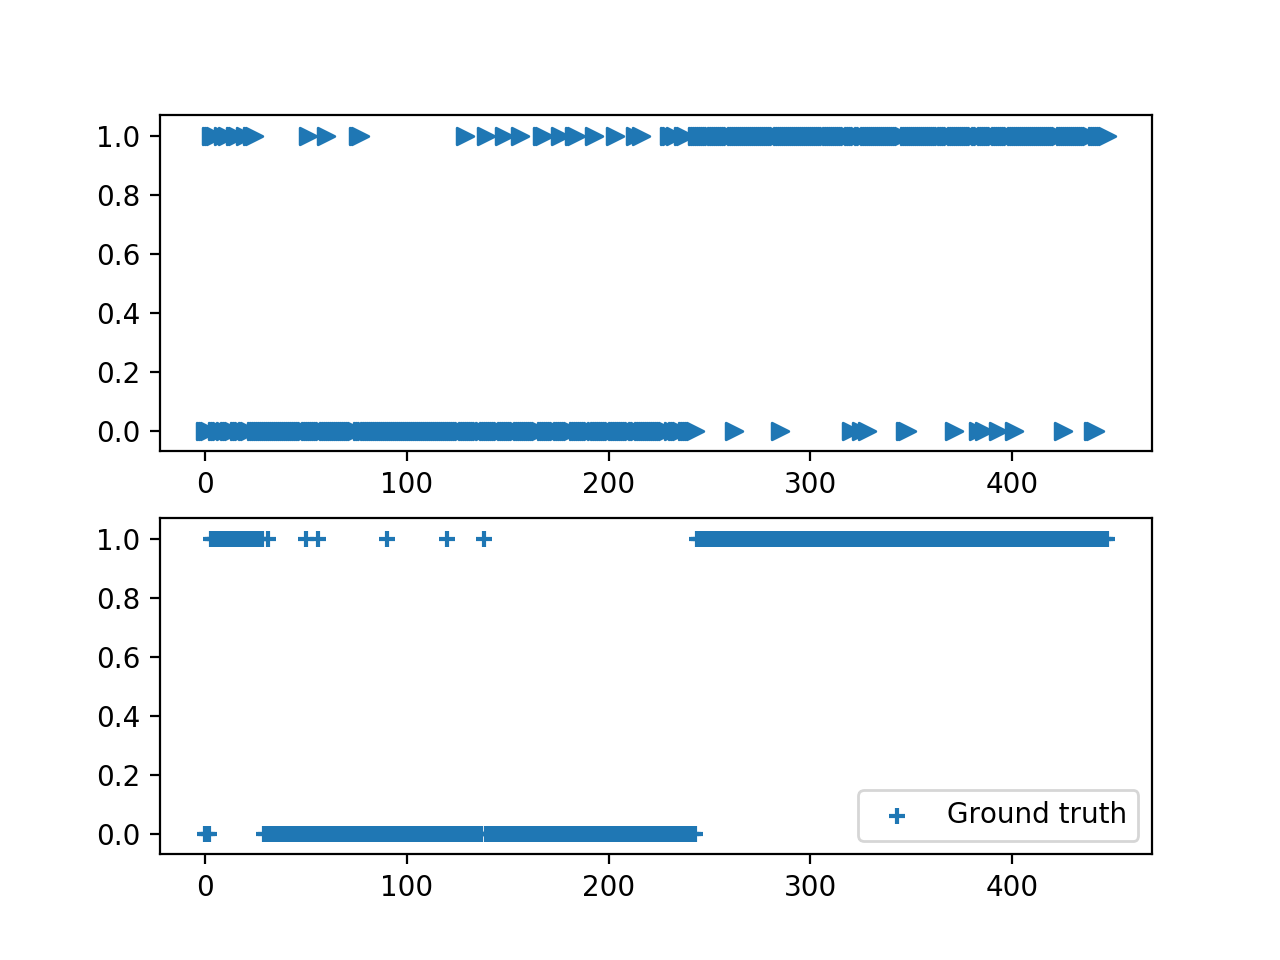

<IPython.core.display.Javascript object>


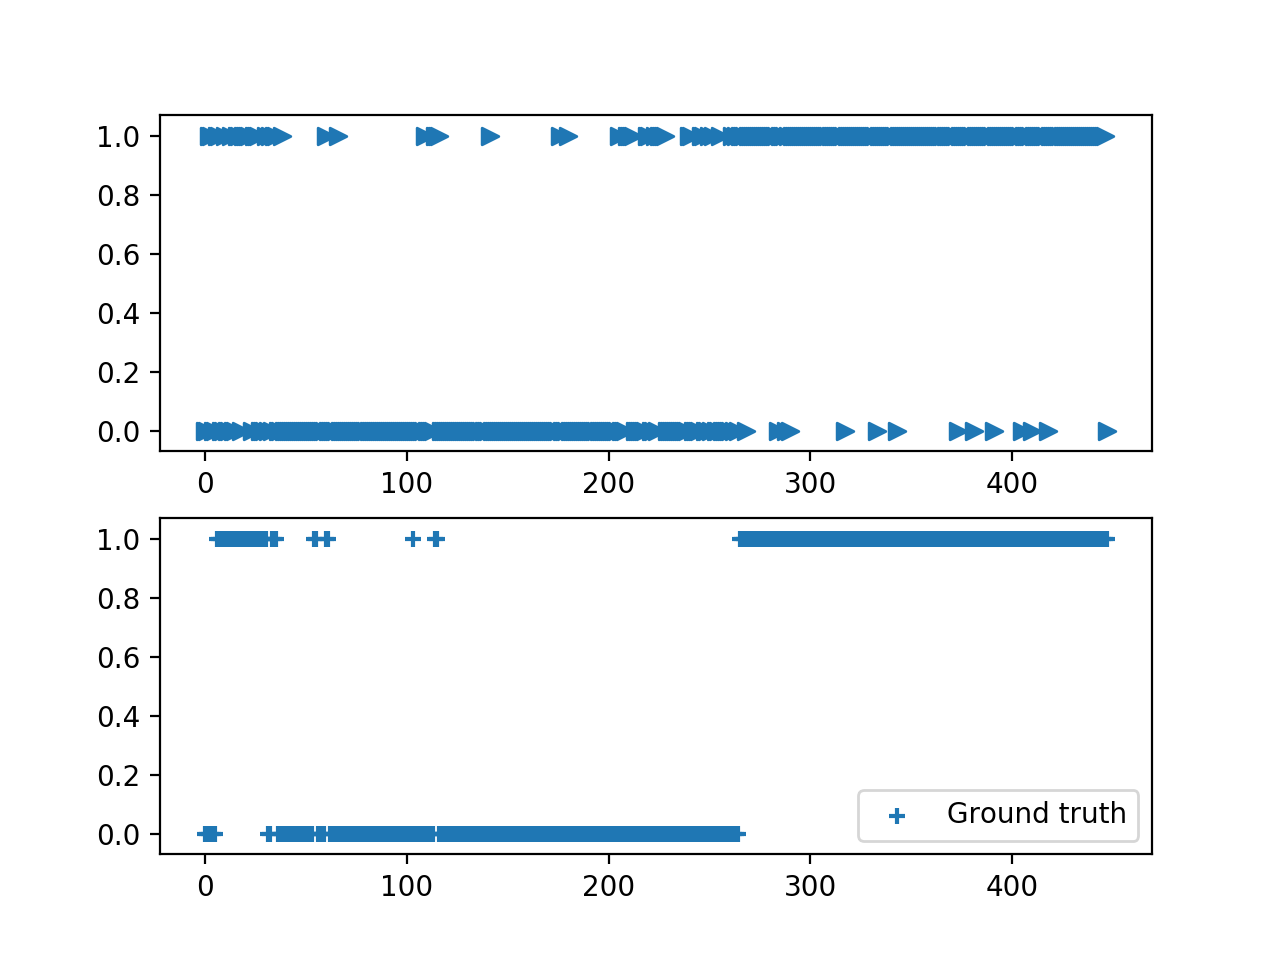

<IPython.core.display.Javascript object>


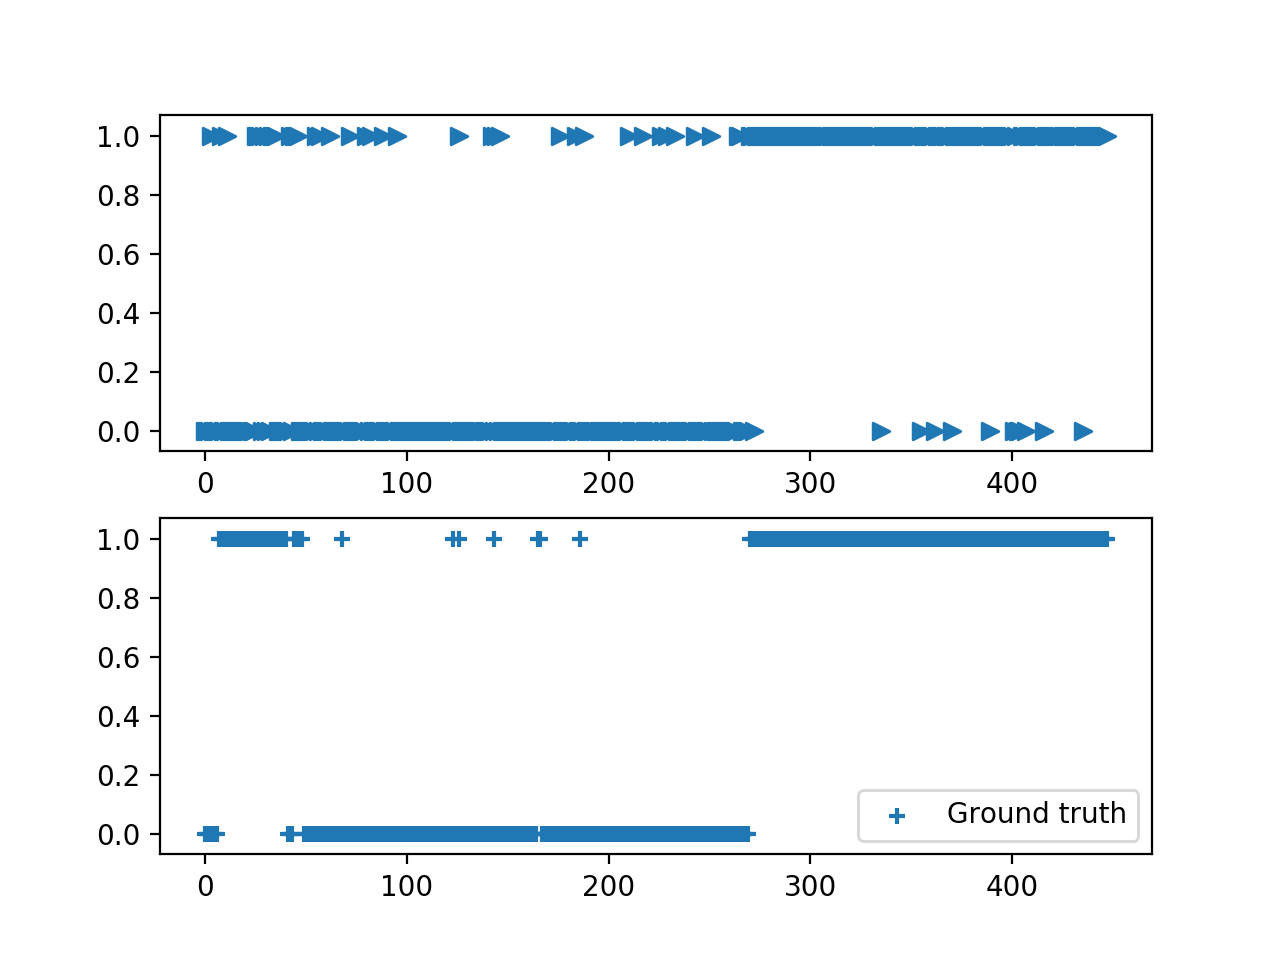

<IPython.core.display.Javascript object>


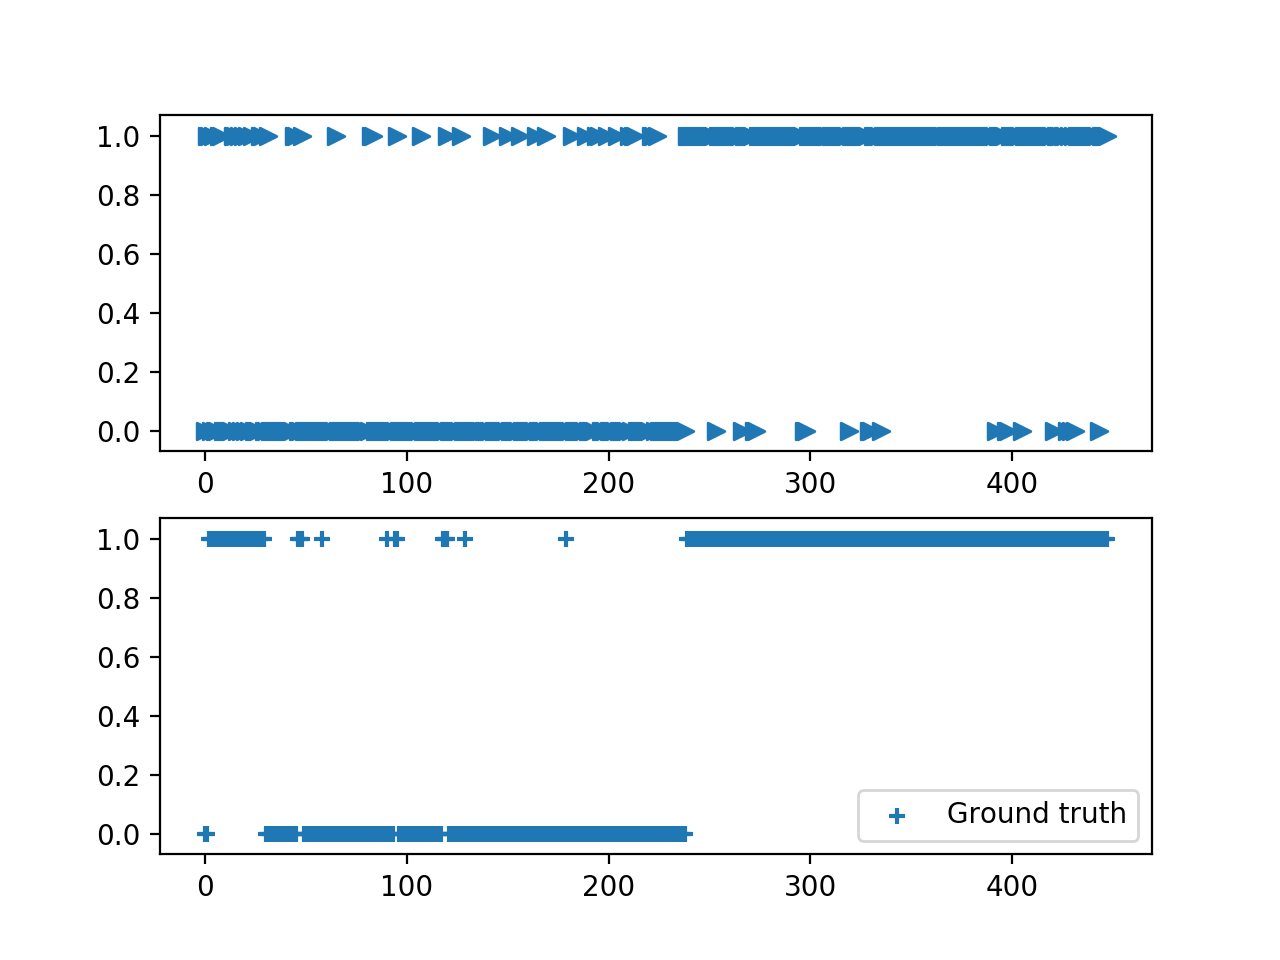

<IPython.core.display.Javascript object>


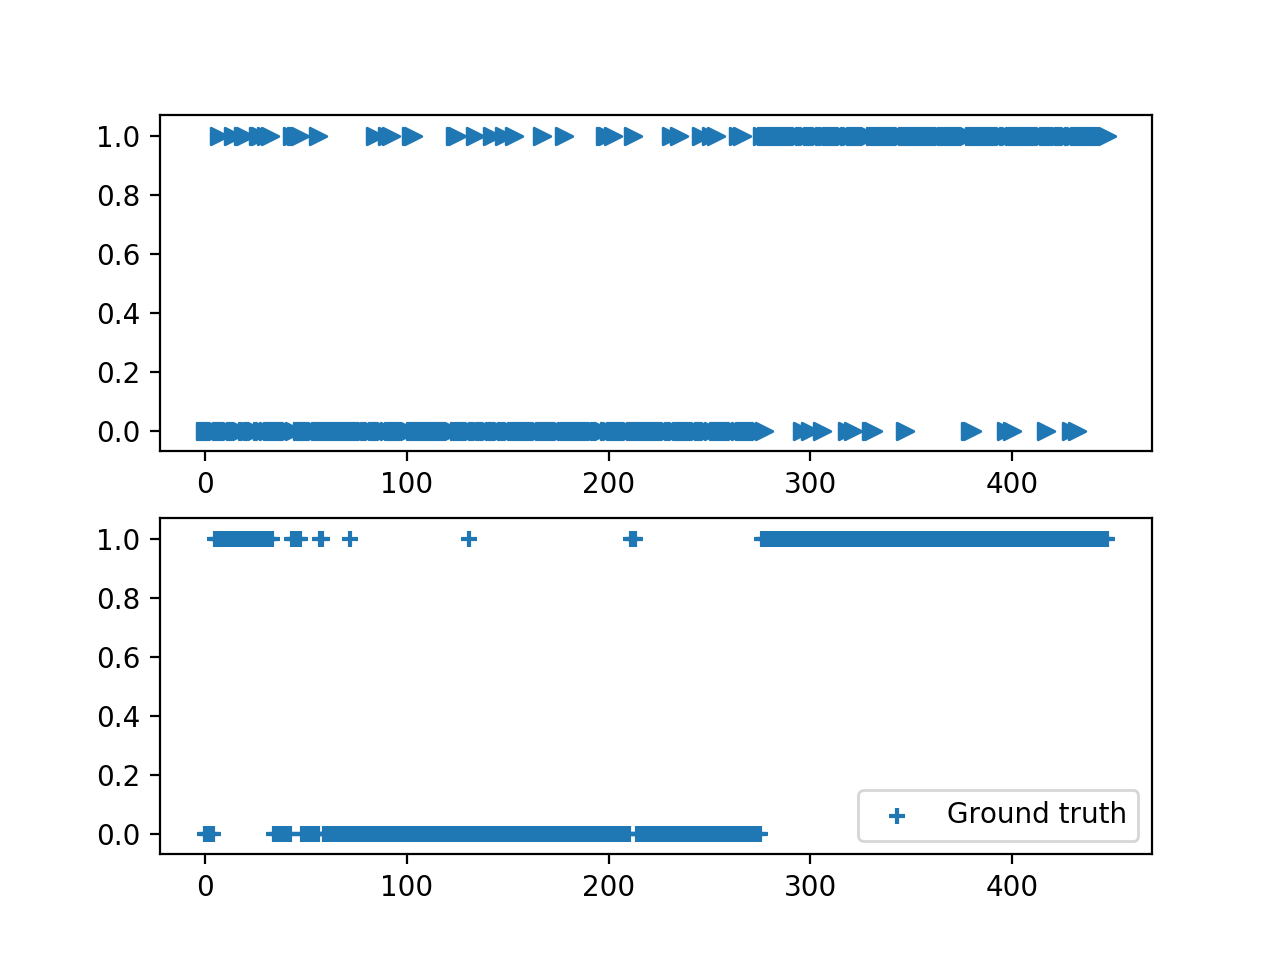

<IPython.core.display.Javascript object>


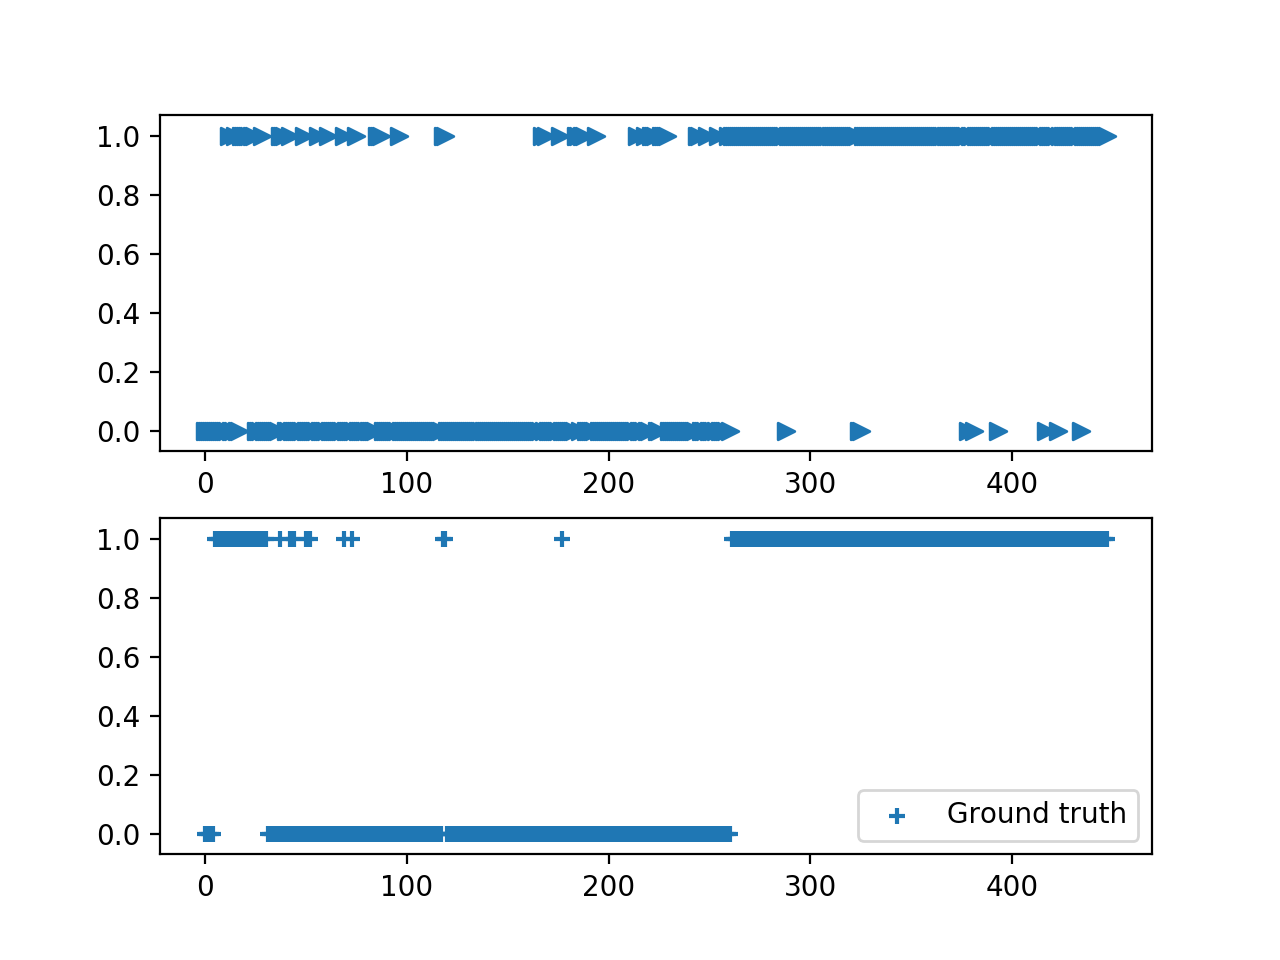

<IPython.core.display.Javascript object>


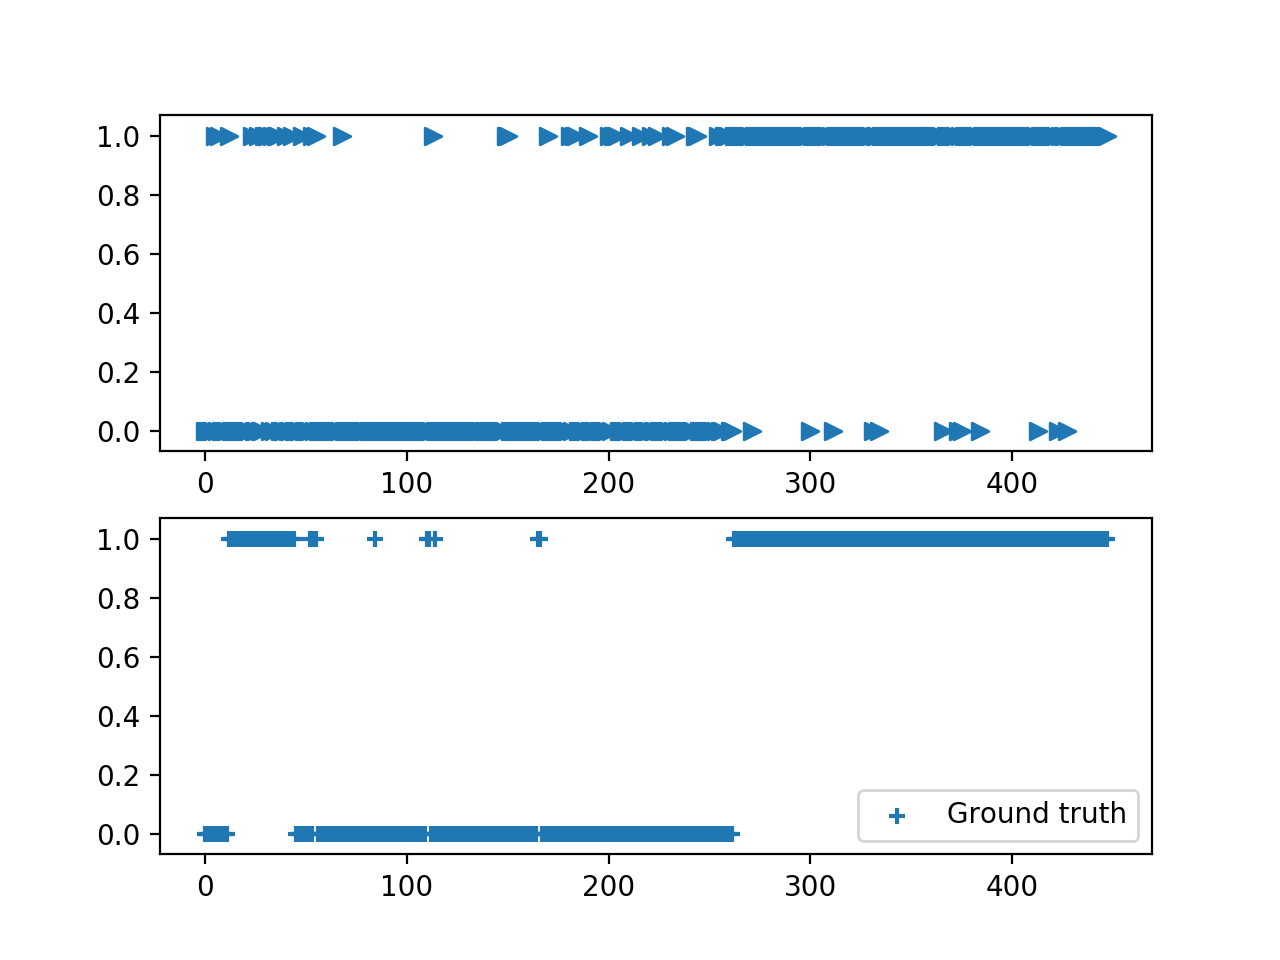

<IPython.core.display.Javascript object>


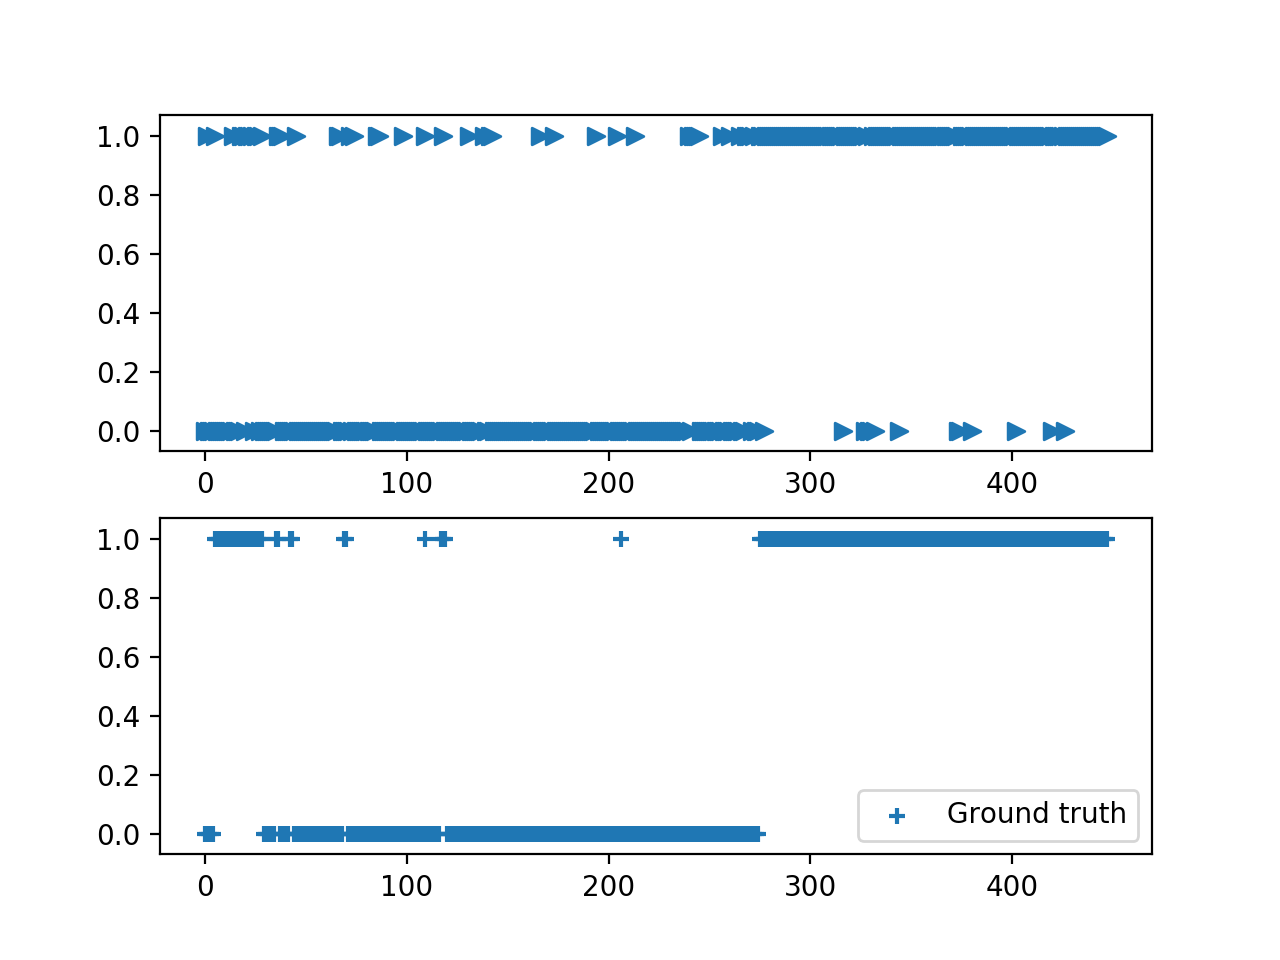

<IPython.core.display.Javascript object>


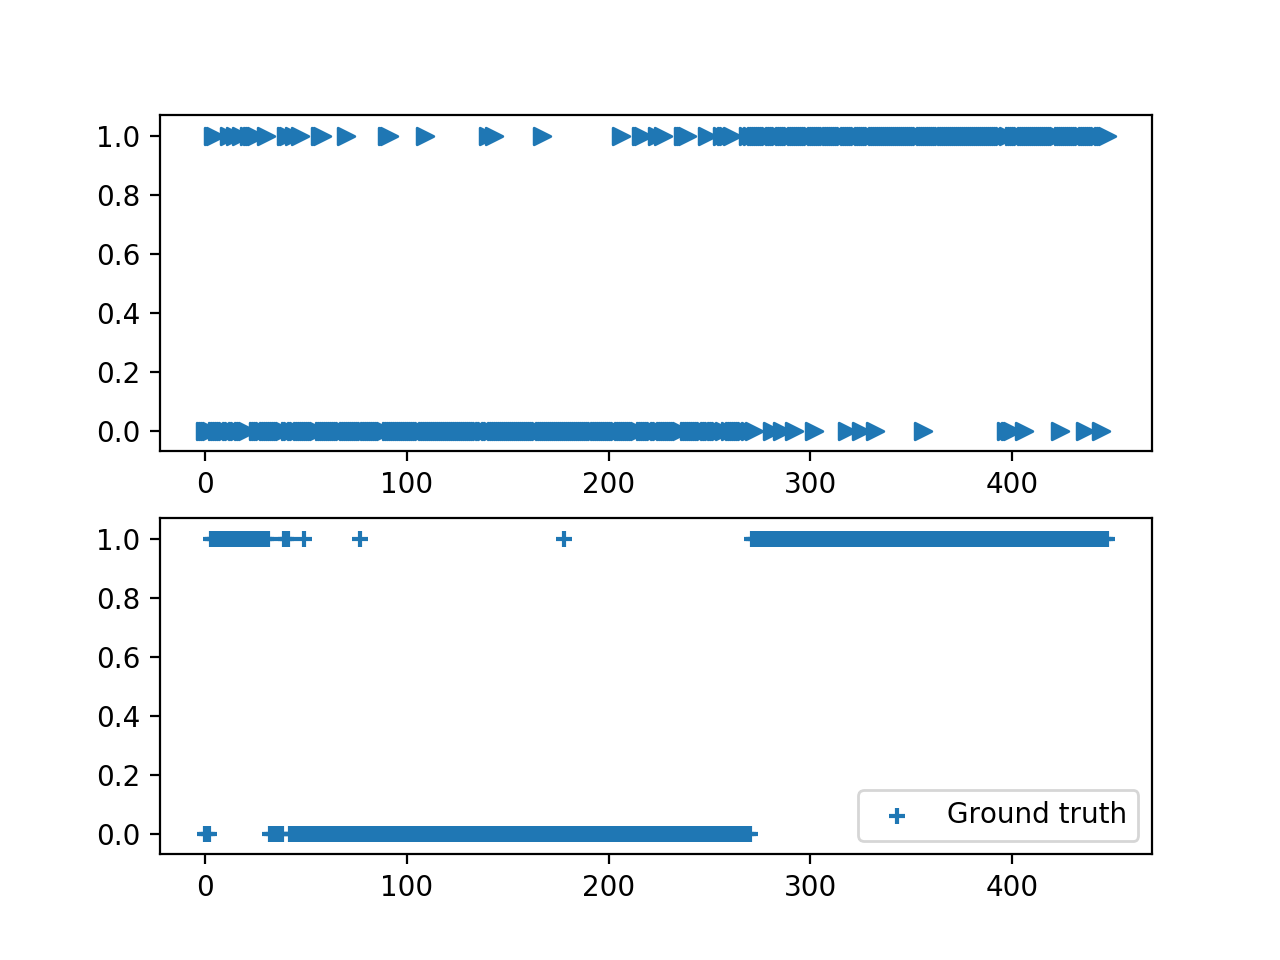

<IPython.core.display.Javascript object>


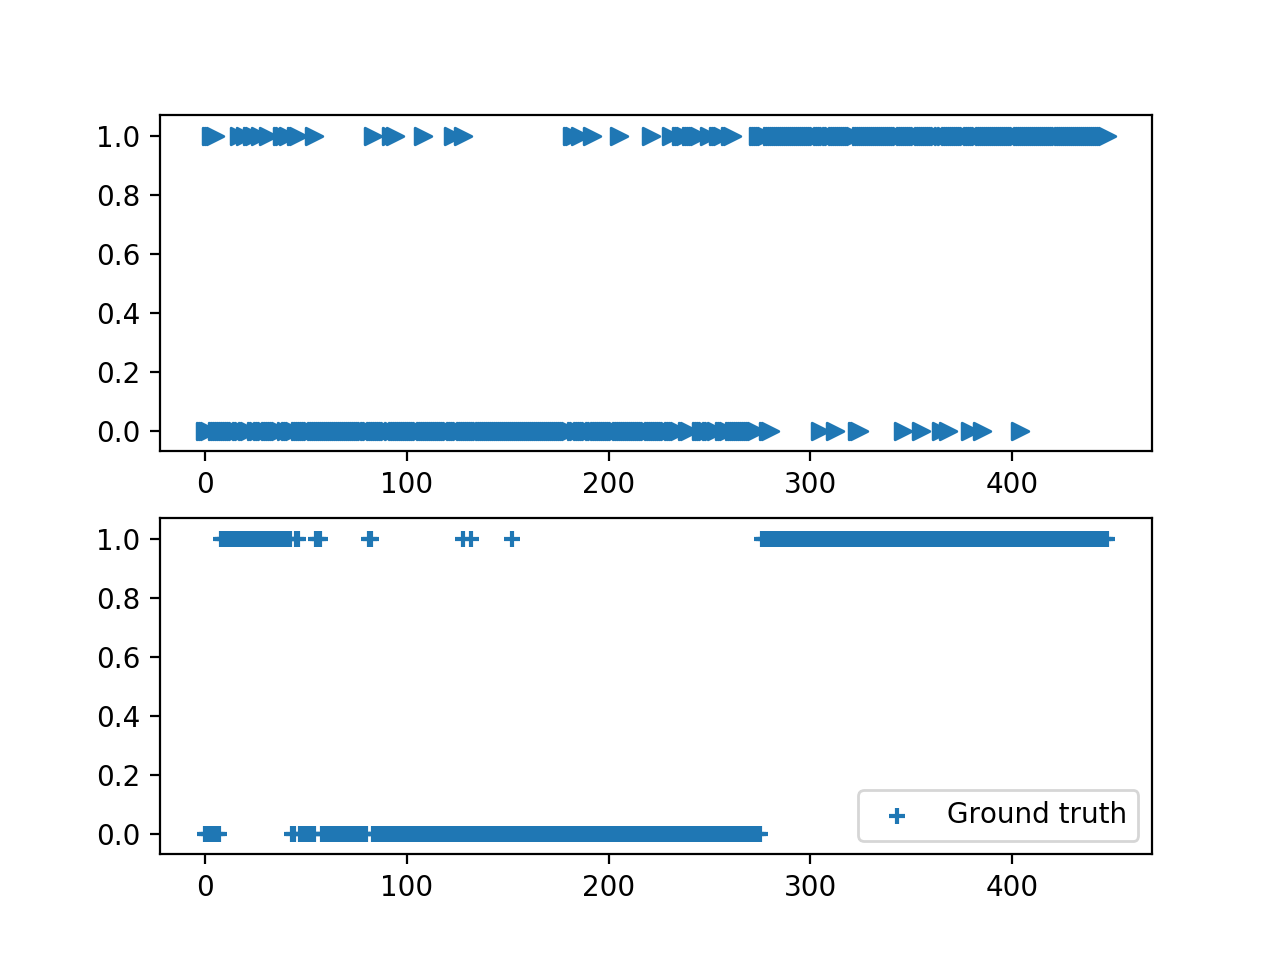

<IPython.core.display.Javascript object>


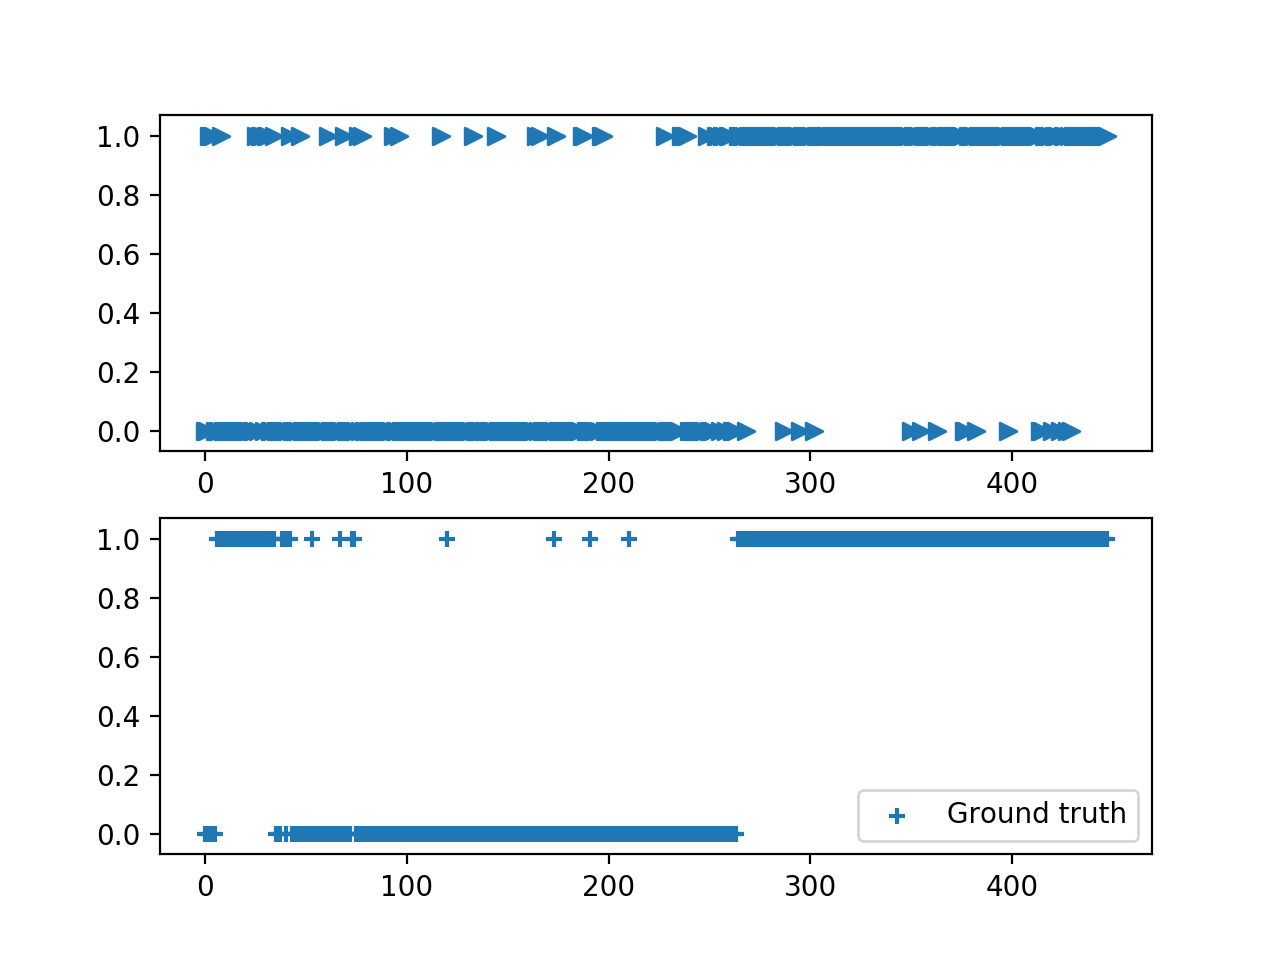

<IPython.core.display.Javascript object>


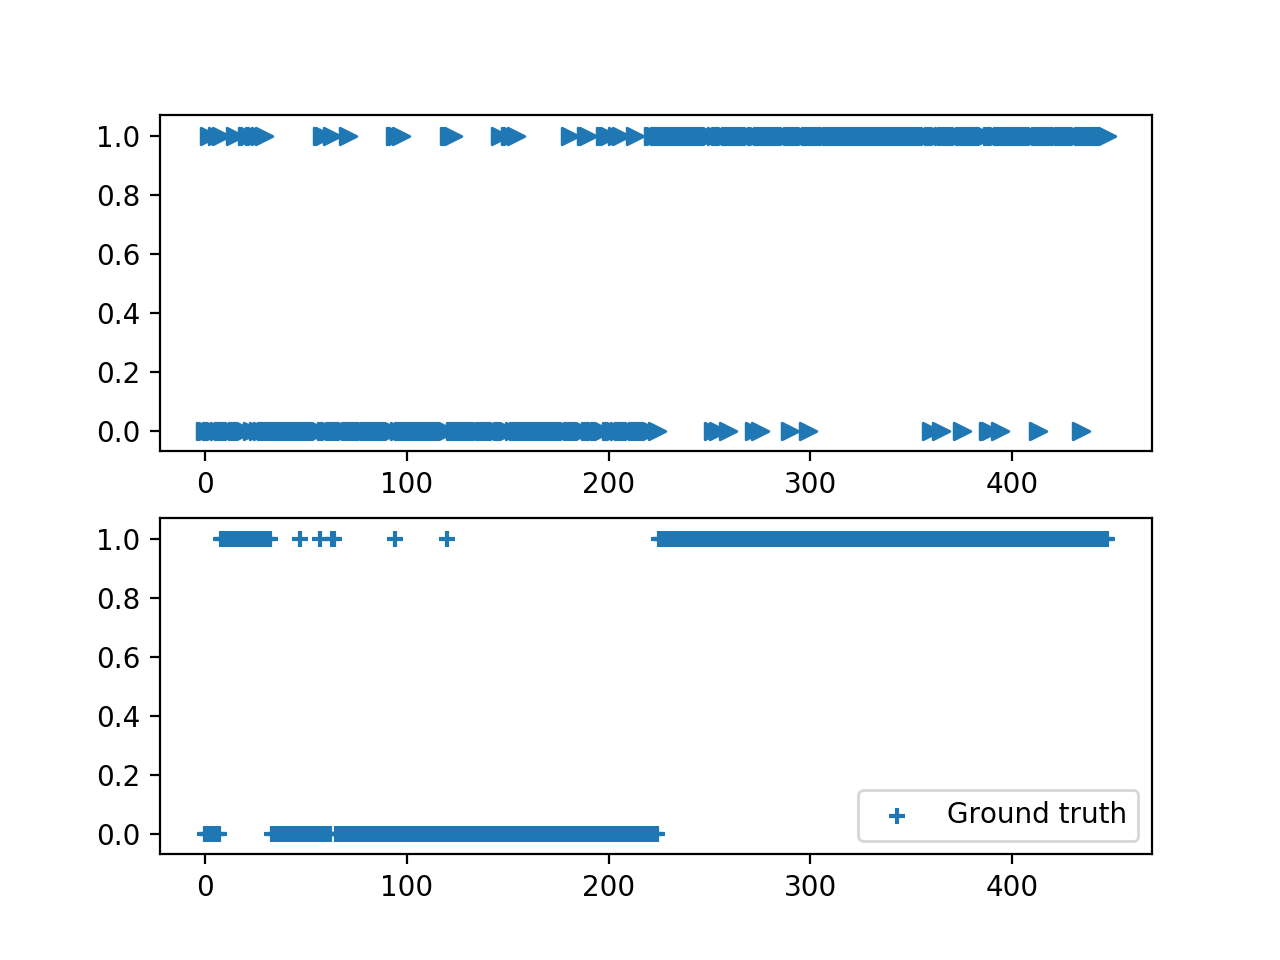

<IPython.core.display.Javascript object>


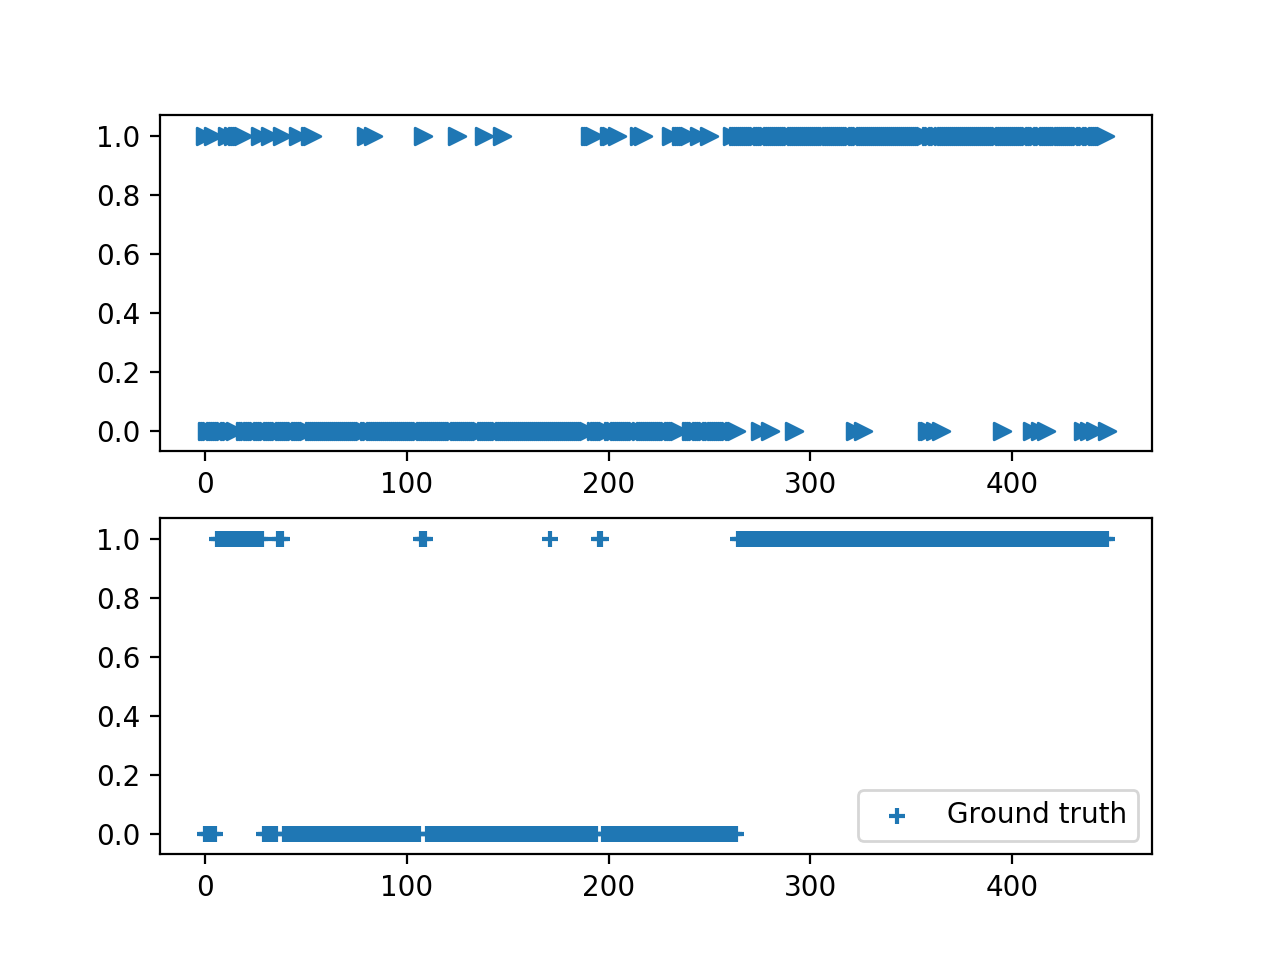

<IPython.core.display.Javascript object>


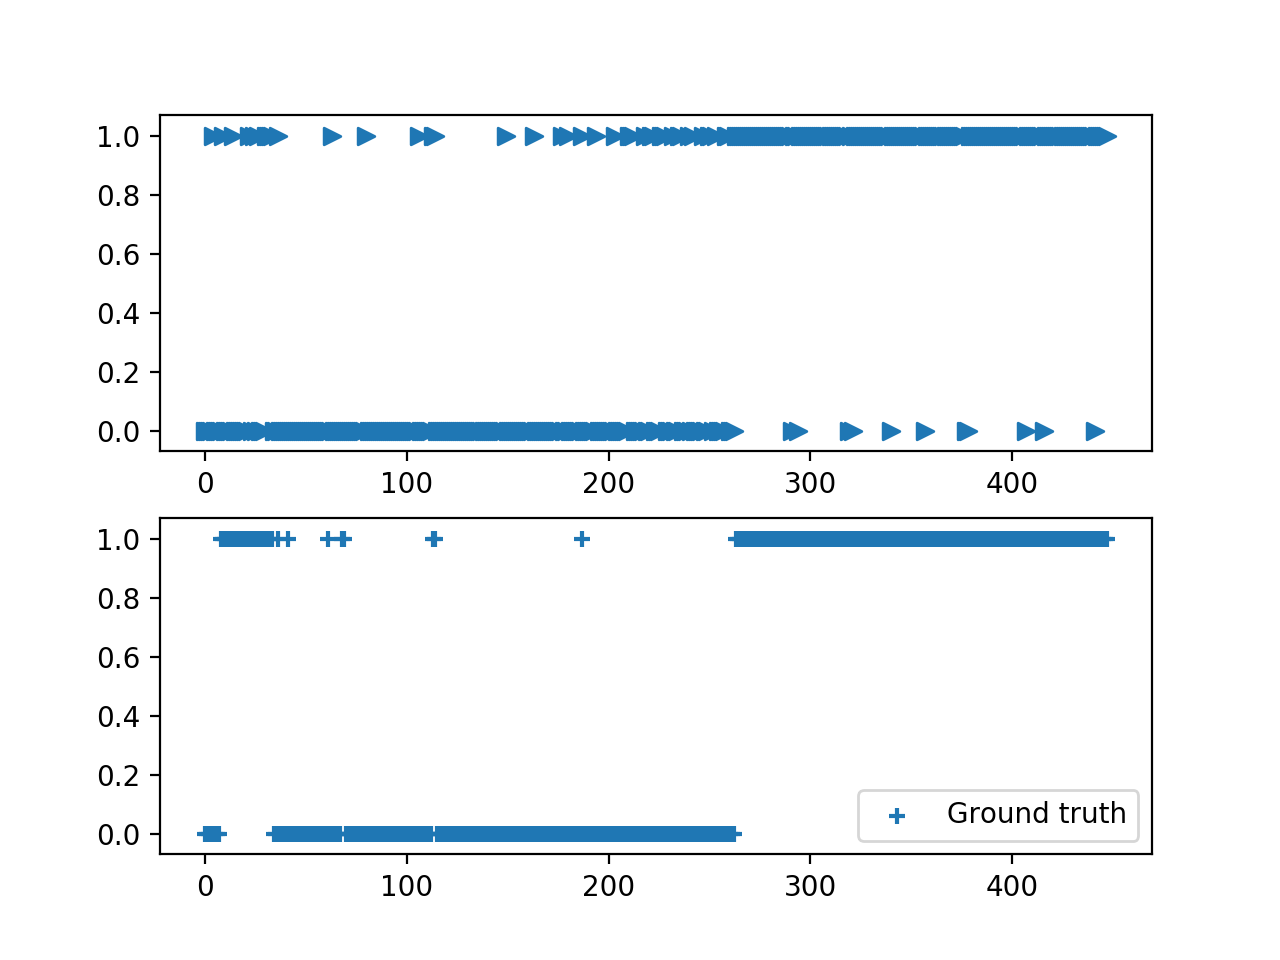

<IPython.core.display.Javascript object>


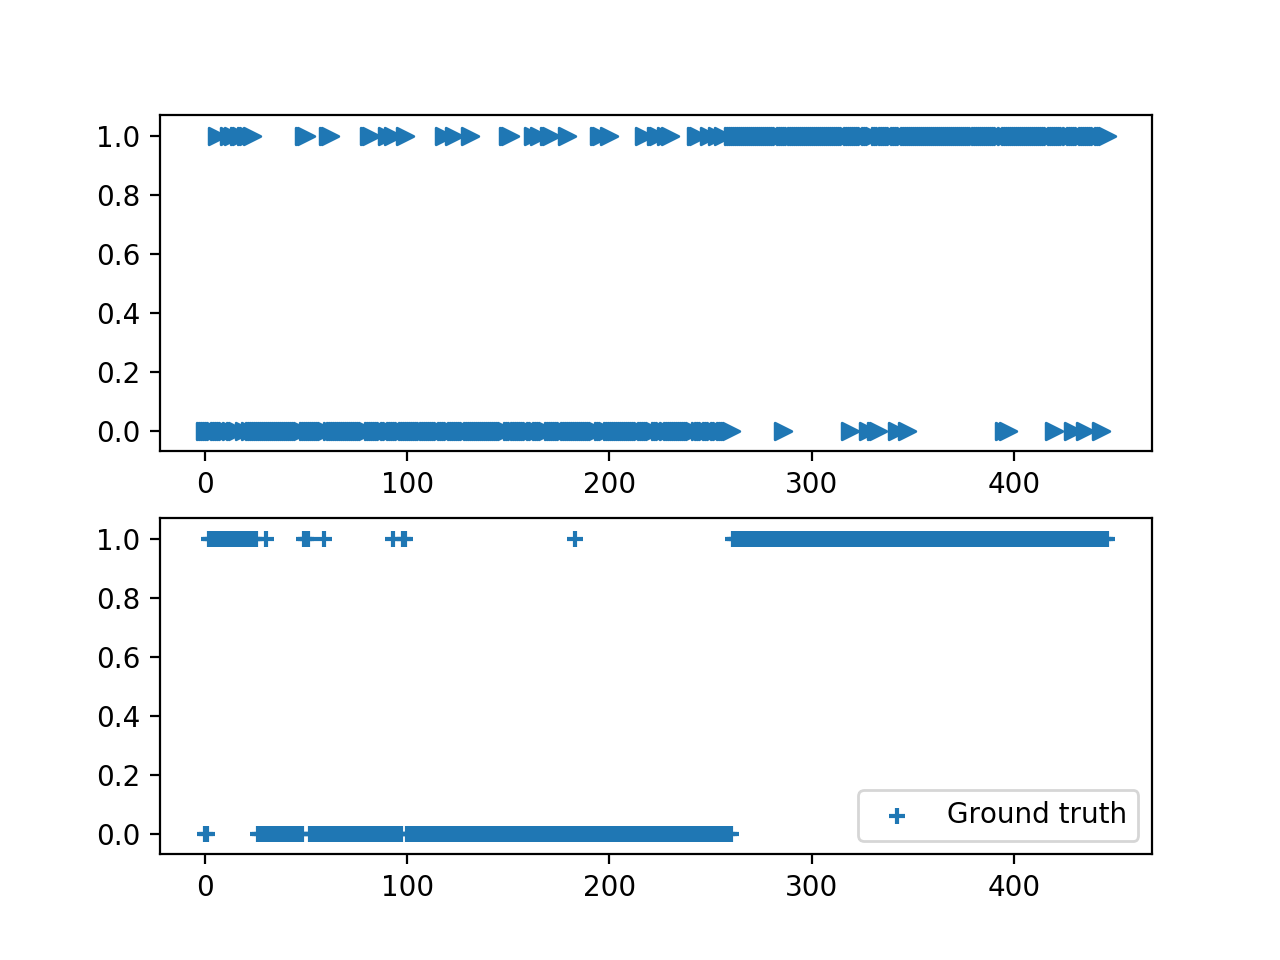

<IPython.core.display.Javascript object>


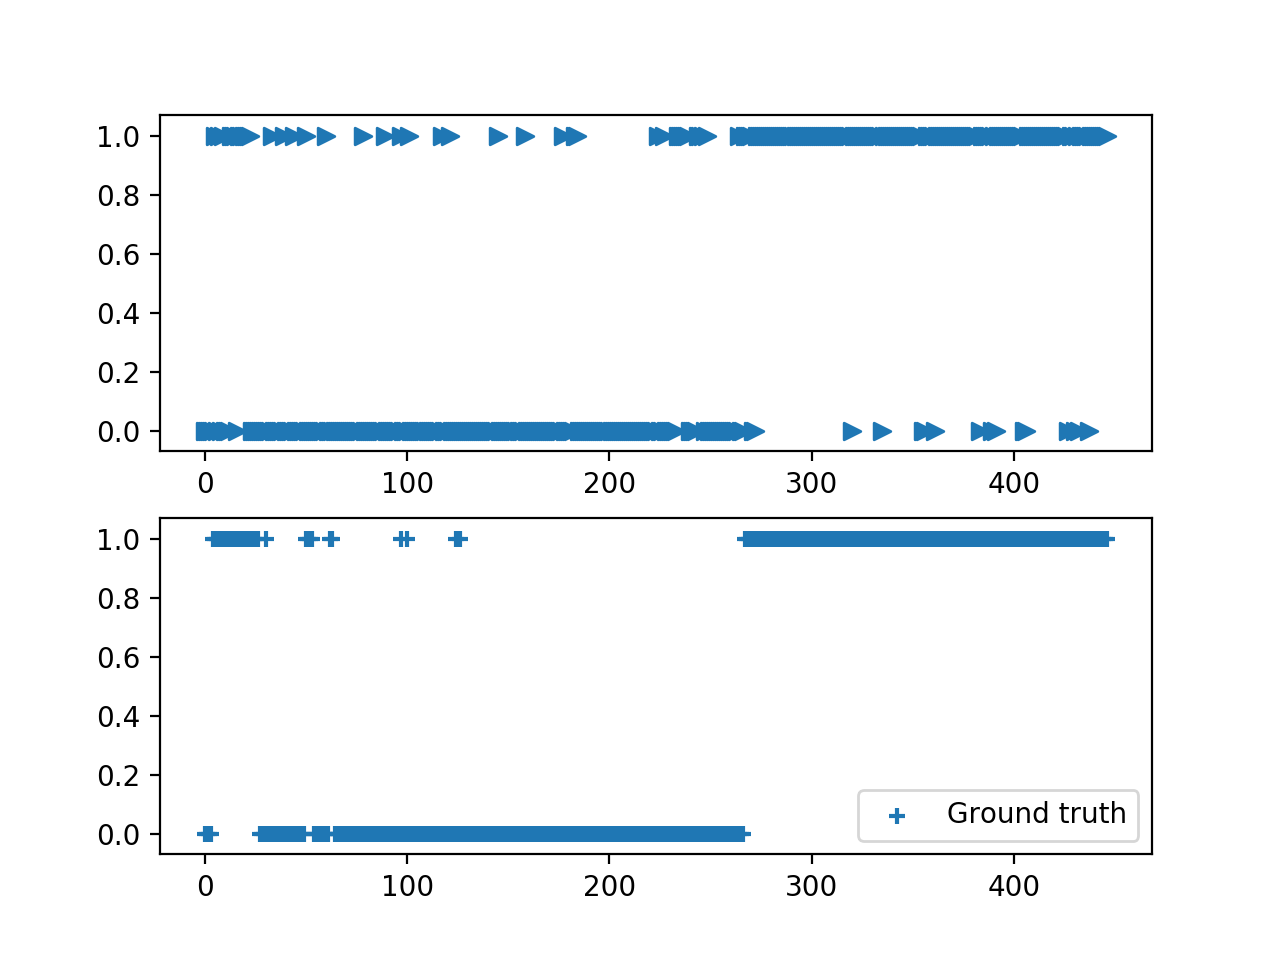

<IPython.core.display.Javascript object>


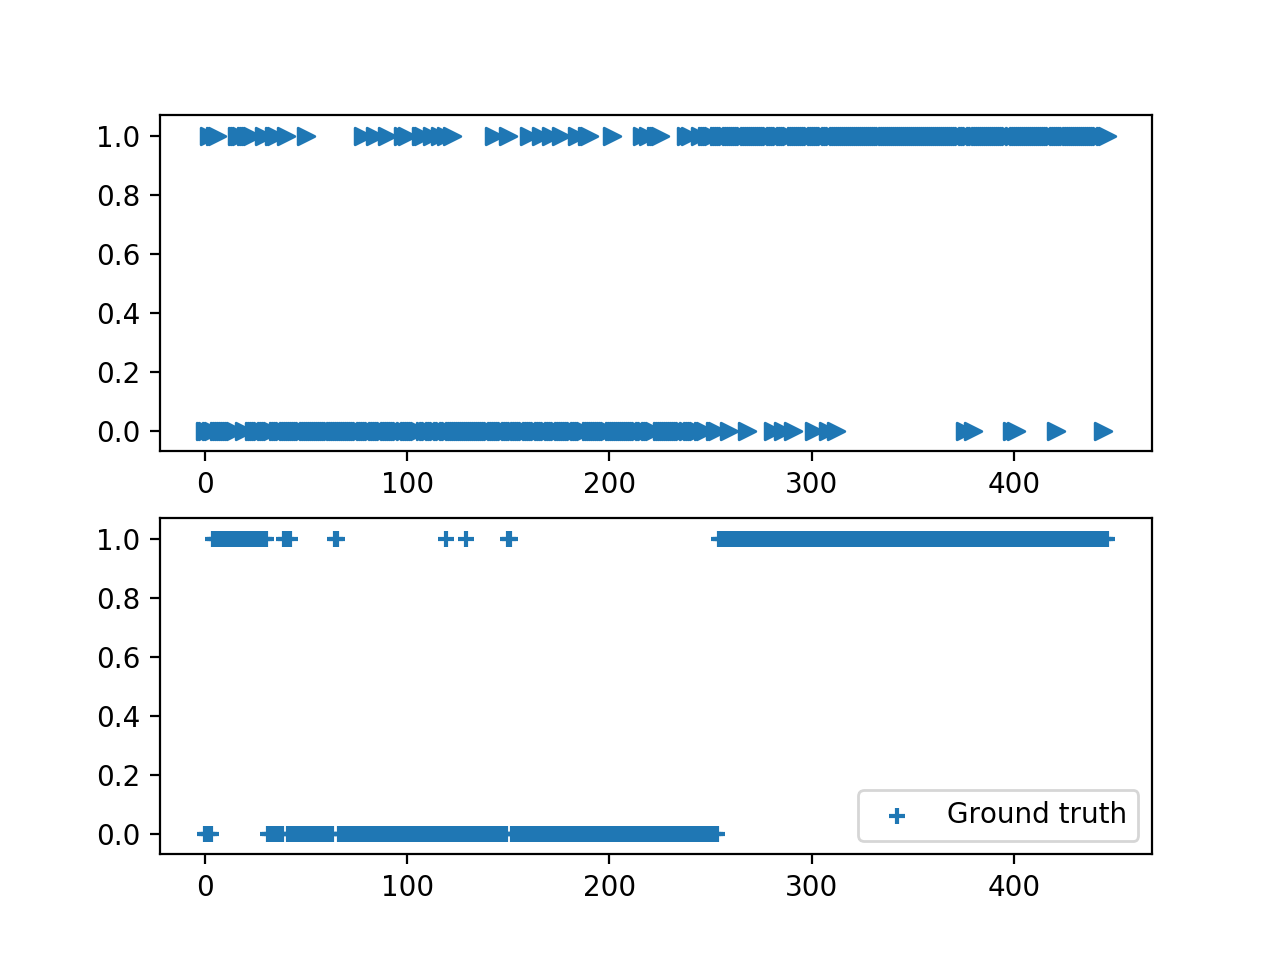

<IPython.core.display.Javascript object>


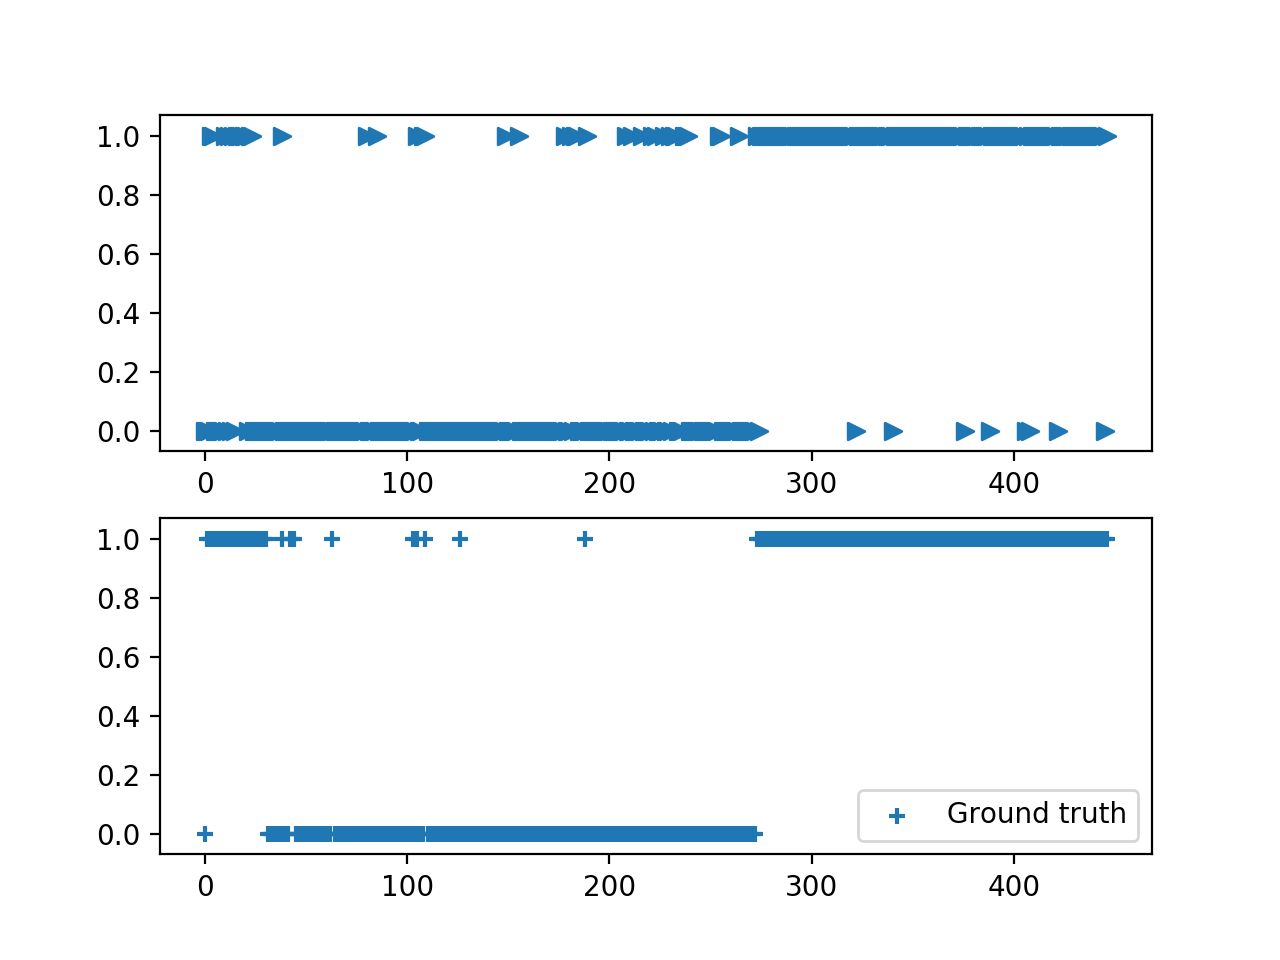

<IPython.core.display.Javascript object>


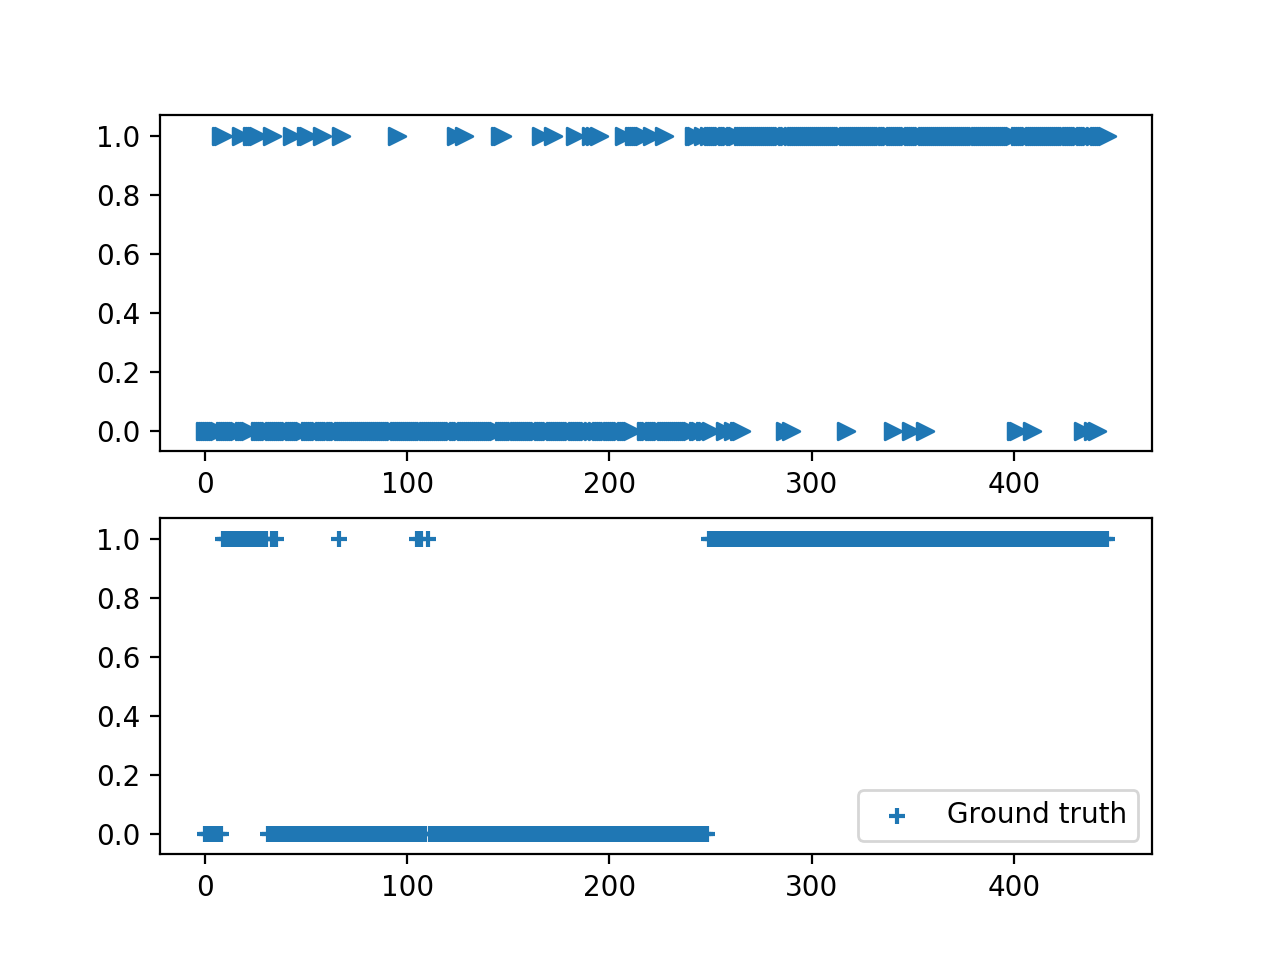

<IPython.core.display.Javascript object>


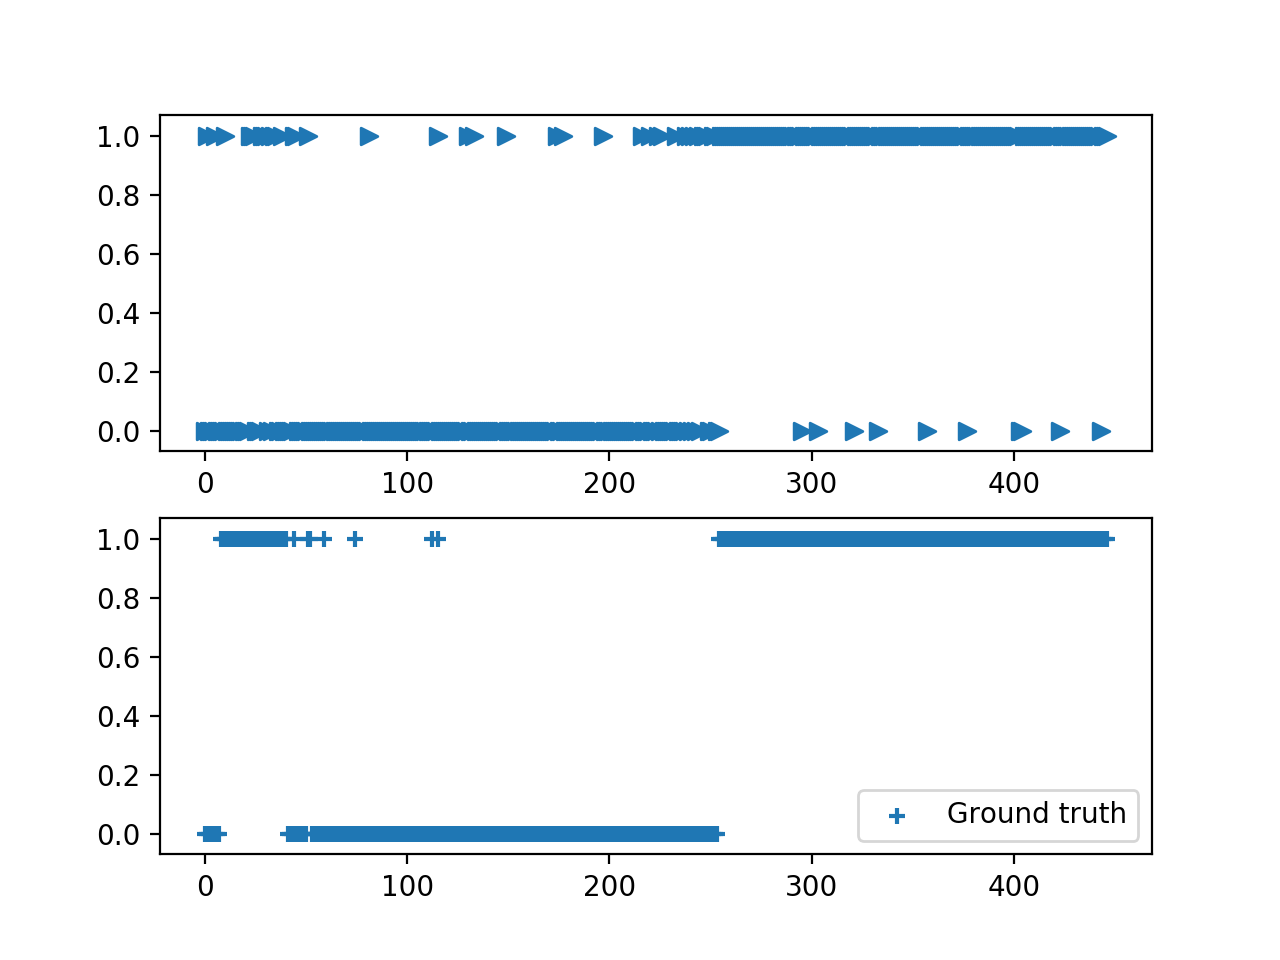

Sepsis = 0 precision CV Average = 0.8365275026063743
Sepsis = 1 precision CV Average= 0.8683968257582837
Sepsis = 0 f1 CV Average = 0.8549481575104508
Sepsis = 1 f1 CV Average = 0.8479652890256277
Sepsis = 0 recall CV Average = 0.8745629602519054
Sepsis = 1 recall CV Average = 0.8288410234573456


In [110]:
from sklearn.model_selection import train_test_split

X_smote_scaled = stdScaler.fit_transform(X_smote)

avg_sep0_precision, avg_sep1_precision, avg_sep0_f1, avg_sep1_f1, avg_sep0_recall, avg_sep1_recall = CV_KFold(X_smote_scaled, y_smote, adaboost, 20)
